# Sharad Kumar Tiwari

# Task 1:- Simple Linear Regression Problem
will predict the percentage ofmarks that a student is expected to score based upon the
number of hours they studied.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset
Use remote link to load dataset.

In [2]:
'''url='http://bit.ly/w-data'
data = pd.read_csv(url)'''
# Or Simply we make csv file and read with the help of pandas 

data = pd.read_csv('C:/Users/Asus/Downloads/student_scores.csv')
print("Data Imported")

data.head()

Data Imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


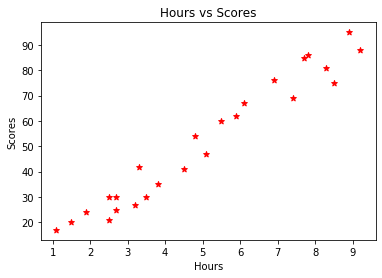

In [3]:
# Ploting the distribution graph between hours and scores

plt.scatter(data.Hours, data.Scores, color='red', marker='*')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

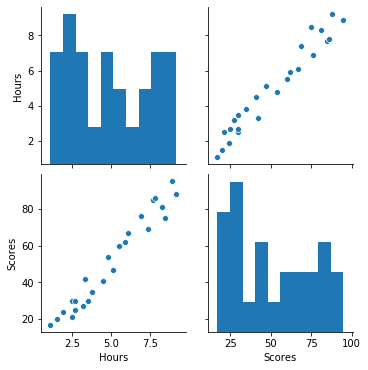

In [9]:
# Plotting a pairplot to find the correlation 
sns.pairplot(data)

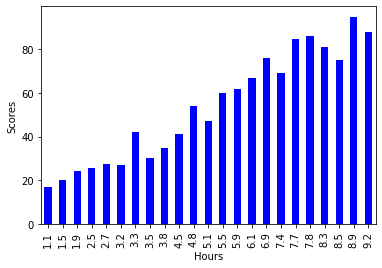

In [50]:
# Plotting a barplot to find the relation between hours and scores
data.groupby(['Hours'])['Scores'].median().plot.bar(color='blue')
plt.ylabel('Scores')
plt.show()

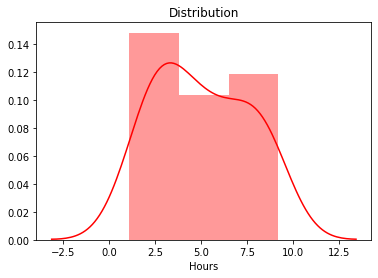

In [48]:
# Plotting histogram to find the distribution of Hours
sns.distplot(data['Hours'],color='red')
plt.xlabel('Hours')
plt.title('Distribution')
plt.show()

From the graph we can see there is a positive relation between the hours and scores. As well as we can see that points are distributed linearly. So we can solve it by using simple linear regressor.

# Preparing data for futher steps
Here we seperate our dataset into two variables, X: 'Attributes" , y: 'Target'.

In [17]:
X= data.iloc[:,:-1]
y= data.iloc[:,-1]

# We can use
'''
X = data.drop(['Scores'],axis=1)
y = data['Scores']'''

"\nX = data.drop(['Scores'],axis=1)\ny = data['Scores']"

In [18]:
# Now we will split our 80% of data into train data and 20% of data into test data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Model Creation

We have done with our analysis and feature engineering part. Now we will create our model for training and prediction.
We will use LinearRegression to train our data.

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

print('Training Completed')

Training Completed


In [20]:
print(model.coef_)
print(model.intercept_)

[9.94061514]
1.5079104828268726


In [21]:
line = ((model.coef_)*X)+ model.intercept_

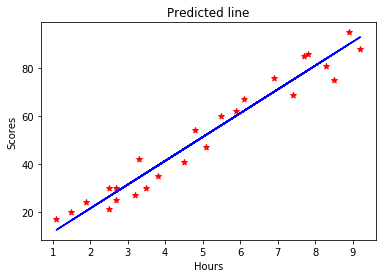

In [22]:
# Ploting the predicting line

plt.scatter(X,y,color='red',marker='*')
plt.plot(X,line,color='blue')
plt.title('Predicted line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Prediction

In [23]:
y_pred = model.predict(X_test)

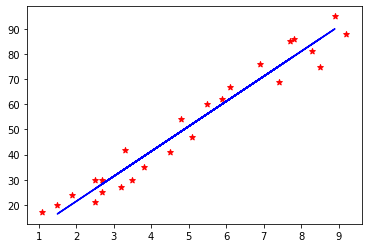

In [24]:
plt.scatter(X,y,color='red',marker='*')
plt.plot(X_train,model.predict(X_train),color='blue')

# Evaluateing the model

In [25]:
# Accuracy
from sklearn.metrics import r2_score,accuracy_score
print('model_score_train : ',model.score(X_train,y_train))
print('model_score_test : ',model.score(X_test,y_test))
print('r2_score : ',r2_score(y_test,y_pred))

model_score_train :  0.9423348138802985
model_score_test :  0.9735538080811826
r2_score :  0.9735538080811826


In [26]:
# Errors
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('Mean Absolute Error : ',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error :  4.877039354964484
Mean Squared Error :  24.38762033985666
Root Mean Squared Error :  4.938382360637607


# Comparing

In [27]:
compare = pd.DataFrame({'Actual':y_test , 'Predicted':y_pred})
compare

,Actual,Predicted
14,17,12.442587
0,21,26.359448
17,24,20.395079
6,88,92.961570
23,76,70.098155


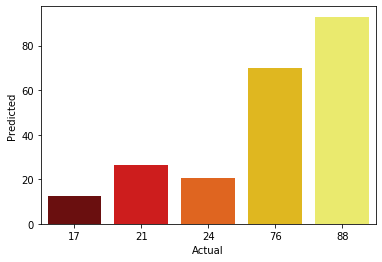

In [30]:
sns.barplot('Actual','Predicted',data=compare,palette='hot')

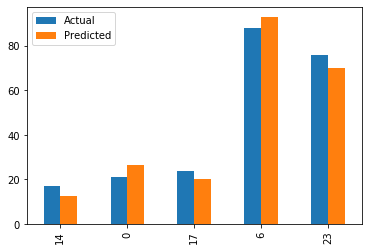

In [47]:
compare.plot(kind='bar',label='Actual')
plt.legend()

In [29]:
# Testing with own data
hours = 9.25
pred = model.predict([[hours]])
print(f'No. of Hours: {hours} and Predicted Score: {pred[0]}')

No. of Hours: 9.25 and Predicted Score: 93.45860055685799
